# ML-Unsupervised-Hierarchical clustering

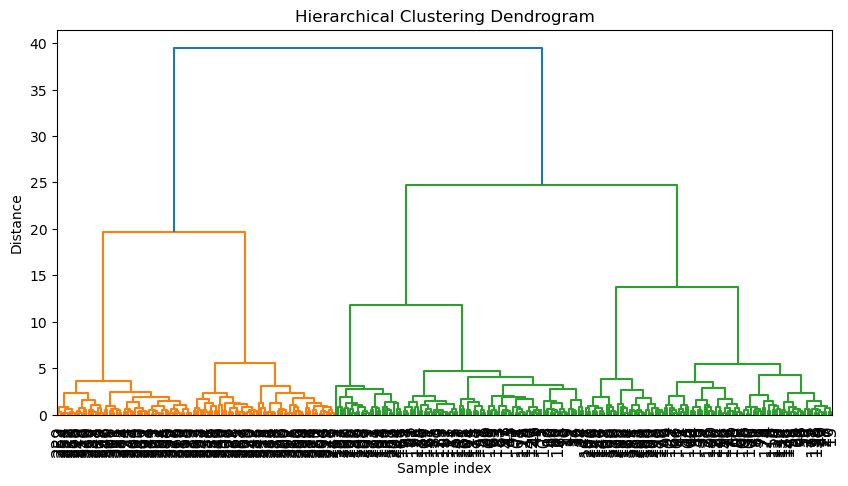

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
3                36.7             19.3              193.0       3450.0   
4                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
327              47.2             13.7              214.0       4925.0   
328              46.8             14.3              215.0       4850.0   
329              50.4             15.7              222.0       5750.0   
330              45.2             14.8              212.0       5200.0   
331              49.9             16.1              213.0       5400.0   

     sex_MALE  Cluster  
0        True        4  
1       False        3  
2       False        3  
3       Fal

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('/Users/gottumukkalasaimanojvarma/Desktop/ML-Unsupervised Learning/penguins.csv')

df.dropna(inplace=True)

df = df[(df['flipper_length_mm'].between(0, 4000))]

#Filter out rows with incorrect or placeholder values in the 'sex' column
df = df.loc[df['sex'].isin(['MALE', 'FEMALE'])]

#Reset index
df.reset_index(drop=True, inplace=True)

df=pd.get_dummies(df, drop_first=True)

# Step 1: Data Preprocessing - Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Step 2: Perform Hierarchical Clustering using 'ward' linkage
Z = linkage(data_scaled, method='ward')

# Step 3: Plot the Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Step 4: Form clusters by cutting the dendrogram at a specific level
# Set the desired number of clusters (e.g., 3 clusters)
clusters = fcluster(Z, t=4, criterion='maxclust')

# Step 5: Add the cluster labels to the original DataFrame
df['Cluster'] = clusters
print(df)
